# Module 6: Prediction of overall network attacks

In [21]:
import pandas as p

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# feature names
features = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "Wrong_fragment", "Urgent", "hot", "num_failed_login", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_ srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host _rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate","class"] 
data = p.read_csv("data6.csv", names = features)

In [24]:
df=data.dropna()

In [25]:
df['attack'] = df['class'].map({'normal.':0, 'snmpgetattack.':1, 'named.':1, 'xlock.':1, 'smurf.':1,
       'ipsweep.':1, 'multihop.':1, 'xsnoop.':1, 'sendmail.':1, 'guess_passwd.':1,
       'saint.':1, 'buffer_overflow.':1, 'portsweep.':1, 'pod.':1, 'apache2.':1,
       'phf.':1, 'udpstorm.':1, 'warezmaster.':1, 'perl.':1, 'satan.':1, 'xterm.':1,
       'mscan.':1, 'processtable.':1, 'ps.':1, 'nmap.':1, 'rootkit.':1, 'neptune.':1,
       'loadmodule.':1, 'imap.':1, 'back.':1, 'httptunnel.':1, 'worm.':1,
       'mailbomb.':1, 'ftp_write.':1, 'teardrop.':1, 'land.':1, 'sqlattack.':1,
       'snmpguess.':1})

In [26]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'Wrong_fragment', 'Urgent', 'hot',
       'num_failed_login', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_ srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host _rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate'
       ]
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)


In [27]:
del df['dst_host_srv_rerror_rate']
del df["class"]

In [28]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [29]:
X = df.drop(labels='attack', axis=1)
#Response variable
y = df.loc[:,'attack']    

In [30]:
 #We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [31]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

Logistic Regression :

In [32]:

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()
logR.fit(X_train,y_train)
predictR = logR.predict(X_test)
print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictR))

cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
lr=accuracy.mean() * 100


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00       896

    accuracy                           1.00       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.99      1.00      0.99       900

Confusion Matrix result of Logistic Regression is:
 [[  0   4]
 [  0 896]]

Sensitivity :  0.0

Specificity :  1.0

Cross validation test results of accuracy:
[0.996 0.996 0.994]

Accuracy result of Logistic Regression is: 99.53333333333333


Decision Tree Classifier :

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictR = dt.predict(X_test)
print("")
print('Classification report of Decision Tree Results:')
print("")
print(classification_report(y_test,predictR))

cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Decision Tree is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(dt, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Decision Tree is:",accuracy.mean() * 100)
dt=accuracy.mean() * 100


Classification report of Decision Tree Results:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00       896

    accuracy                           0.99       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.99      0.99      0.99       900

Confusion Matrix result of Decision Tree is:
 [[  0   4]
 [  2 894]]

Sensitivity :  0.0

Specificity :  0.9977678571428571

Cross validation test results of accuracy:
[0.996 0.996 0.994]

Accuracy result of Decision Tree is: 99.53333333333333


Random Forest:

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictR = rfc.predict(X_test)
print("")
print('Classification report of Random Forest Results:')
print("")
print(classification_report(y_test,predictR))
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Random Forest is:",accuracy.mean() * 100)
rf=accuracy.mean() * 100


Classification report of Random Forest Results:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00       896

    accuracy                           1.00       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.99      1.00      0.99       900


Confusion Matrix result of Random Forest is:
 [[  0   4]
 [  0 896]]

Sensitivity :  0.0

Specificity :  1.0

Cross validation test results of accuracy:
[0.996 0.996 0.996]

Accuracy result of Random Forest is: 99.6


Support Vector Classifier:

In [35]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
predictSVC = sv.predict(X_test)
print("")
print('Classification report of Support Vector Classifier Results:')
print("")
print(classification_report(y_test,predictSVC))

print("")
cm4=confusion_matrix(y_test,predictSVC)
print('Confusion Matrix result of Support Vector Classifier is:\n', confusion_matrix(y_test,predictSVC))
print("")
sensitivity1 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity1)

accuracy = cross_val_score(sv, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Support Vector Classifier is:",accuracy.mean() * 100)
sv=accuracy.mean() * 100


Classification report of Support Vector Classifier Results:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00       896

    accuracy                           1.00       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.99      1.00      0.99       900


Confusion Matrix result of Support Vector Classifier is:
 [[  0   4]
 [  0 896]]

Sensitivity :  0.0

Specificity :  1.0
Cross validation test results of accuracy:
[0.996 0.996 0.996]

Accuracy result of Support Vector Classifier is: 99.6


Naive Bayes:

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictR = gnb.predict(X_test)
print("")
print('Classification report of Naive Bayes Results:')
print("")
print(classification_report(y_test,predictR))

print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(gnb, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of  Naive Bayes is:",accuracy.mean() * 100)
nb=accuracy.mean() * 100


Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

           0       0.01      1.00      0.01         4
           1       1.00      0.16      0.27       896

    accuracy                           0.16       900
   macro avg       0.50      0.58      0.14       900
weighted avg       1.00      0.16      0.27       900


Confusion Matrix result of Naive Bayes is:
 [[  4   0]
 [757 139]]

Sensitivity :  1.0

Specificity :  0.15513392857142858

Cross validation test results of accuracy:
[0.135 0.194 0.148]

Accuracy result of  Naive Bayes is: 15.9


K-Nearest Neighbor:

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train)
predictR = knnc.predict(X_test)
print("")
print('Classification report of K-Nearest Neighbor Results:')
print("")
print(classification_report(y_test,predictR))

print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of K-Nearest Neighbor is:\n',cm2)
print("")
sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(knnc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of  K-Nearest Neighbor is:",accuracy.mean() * 100)
kn=accuracy.mean() * 100


Classification report of K-Nearest Neighbor Results:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      1.00      1.00       896

    accuracy                           1.00       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.99      1.00      0.99       900


Confusion Matrix result of K-Nearest Neighbor is:
 [[  0   4]
 [  0 896]]

Sensitivity :  0.0

Specificity :  1.0

Cross validation test results of accuracy:
[0.996 0.996 0.996]

Accuracy result of  K-Nearest Neighbor is: 99.6


In [38]:
def graph():
    import matplotlib.pyplot as plt
    data=[lr,dt,rf,sv,nb,kn]
    alg="LR","DT","RF","SVM","NB","KNN"
    plt.figure(figsize=(10,5))
    b=plt.bar(alg,data,color=("r","g","b","y","m","black"))
    plt.title("Accuracy comparison of Overall Attacks",fontsize=15)
    plt.legend(b,data,fontsize=9)
    plt.savefig('overallattack.png')

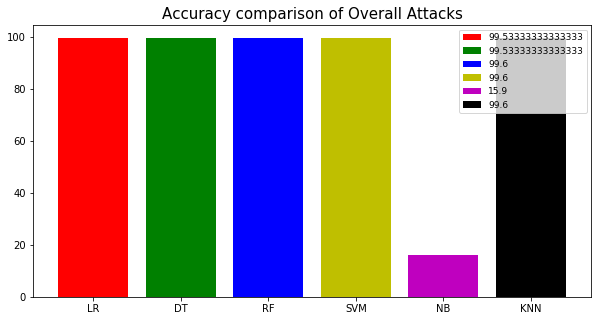

In [39]:
graph()

In [40]:

import tkinter
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import numpy as np
root = tkinter.Tk()
root.wm_title("Accuracy plot for Overall Attacks")
fig = Figure(figsize=(10,10),dpi=1)
canvas = FigureCanvasTkAgg(fig, master=root)  
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
icon=tkinter.PhotoImage(file='overallattack.png')   
label=tkinter.Label(root,image=icon)
label.pack()
root.mainloop()